Accuracy: 0.80
Precision: 0.90
Recall: 0.75
F1 Score: 0.82


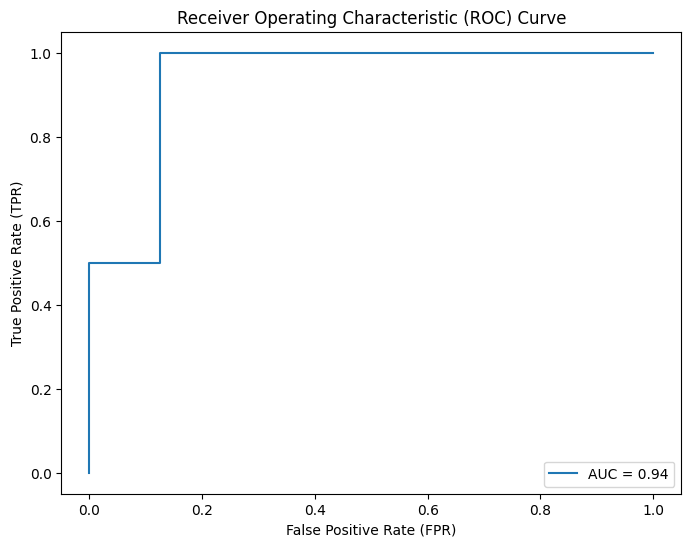

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Step 1: Load and explore the dataset
# Assuming your dataset is in a CSV file named 'your_dataset.csv' without quotes and headers
# Replace 'your_dataset.csv' with the actual filename of your dataset.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/studentData.csv', header=None)  # No header specified

# Step 2: Split the elements
df[['exam1', 'exam2', 'admitted']] = df[0].str.split(',', expand=True)

# Step 3: Data Preprocessing
# Convert the columns to numeric
df['exam1'] = pd.to_numeric(df['exam1'])
df['exam2'] = pd.to_numeric(df['exam2'])
df['admitted'] = pd.to_numeric(df['admitted'])

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['exam1', 'exam2']])

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['admitted'], test_size=0.2, random_state=42)

# Step 6: Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 8: Fine-tuning (if needed)
# Adjust hyperparameters or perform feature engineering if necessary.

# Step 9: Prediction
# Use the trained model to make predictions on new data.

# Step 10: ROC Curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()